In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Add the src directory to the system path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from models import get_model  
from utils import load_data  
from logger import logger

try:
    # Load the dataset using the load_data function from utils
    X, y = load_data()  
    logger.info('Dataset loaded successfully.')

except ImportError as e:
    logger.error(f"Import error: {e}")
    sys.exit(1)  # Exit if modules cannot be imported

except Exception as e:
    logger.error(f"An unexpected error occurred: {e}")
    sys.exit(1)  # Exit if any other error occurs


2025-02-12 05:20:03,216 - utils.py - load_data - INFO - Dataset loaded with shape: (251, 8)
2025-02-12 05:20:03,245 - 1586171268.py - <module> - INFO - Dataset loaded successfully.


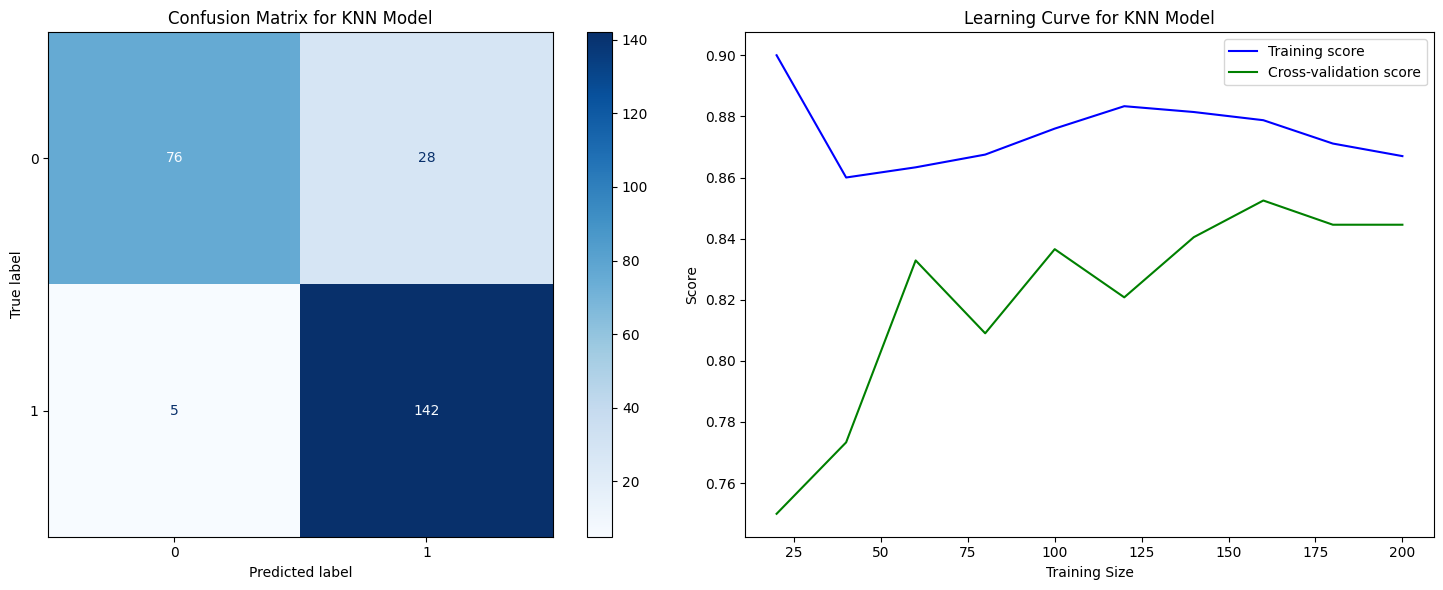

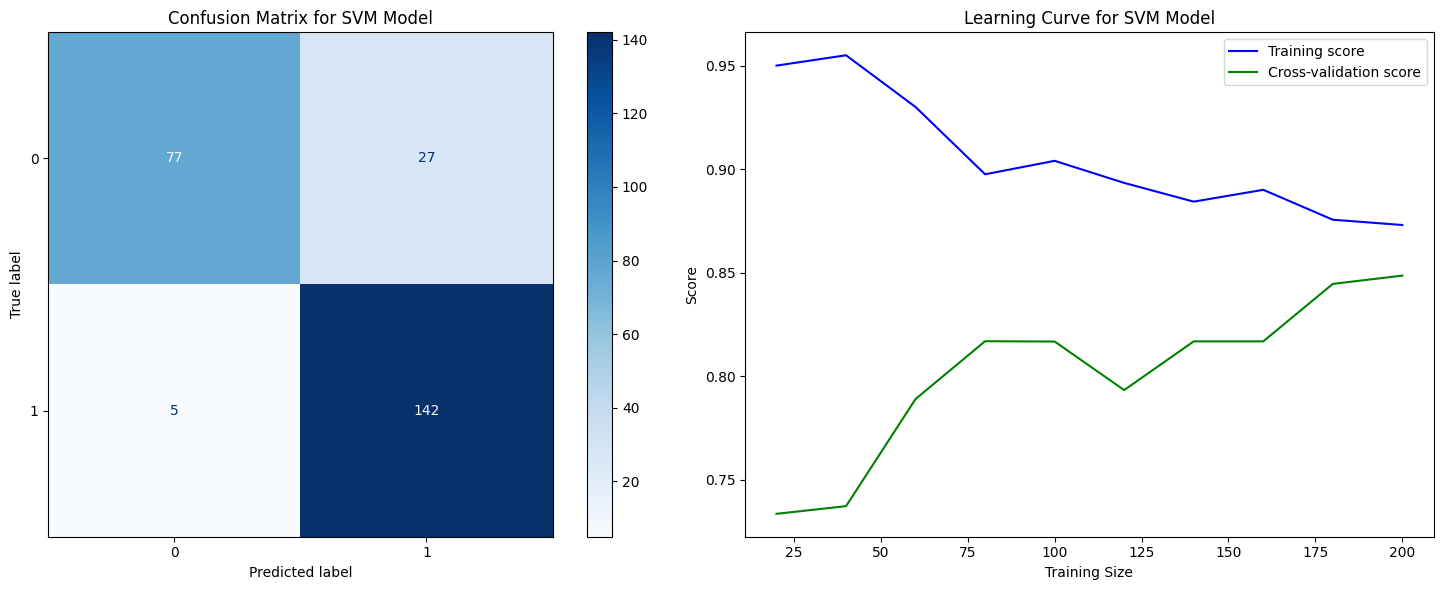

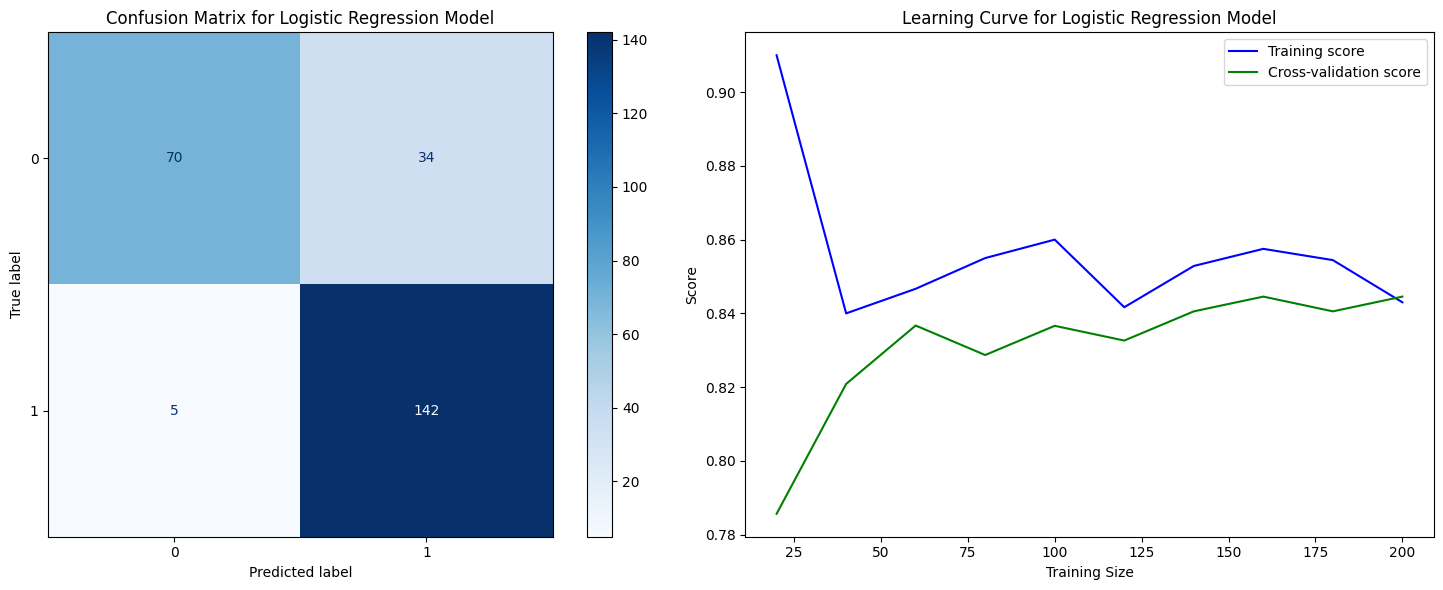

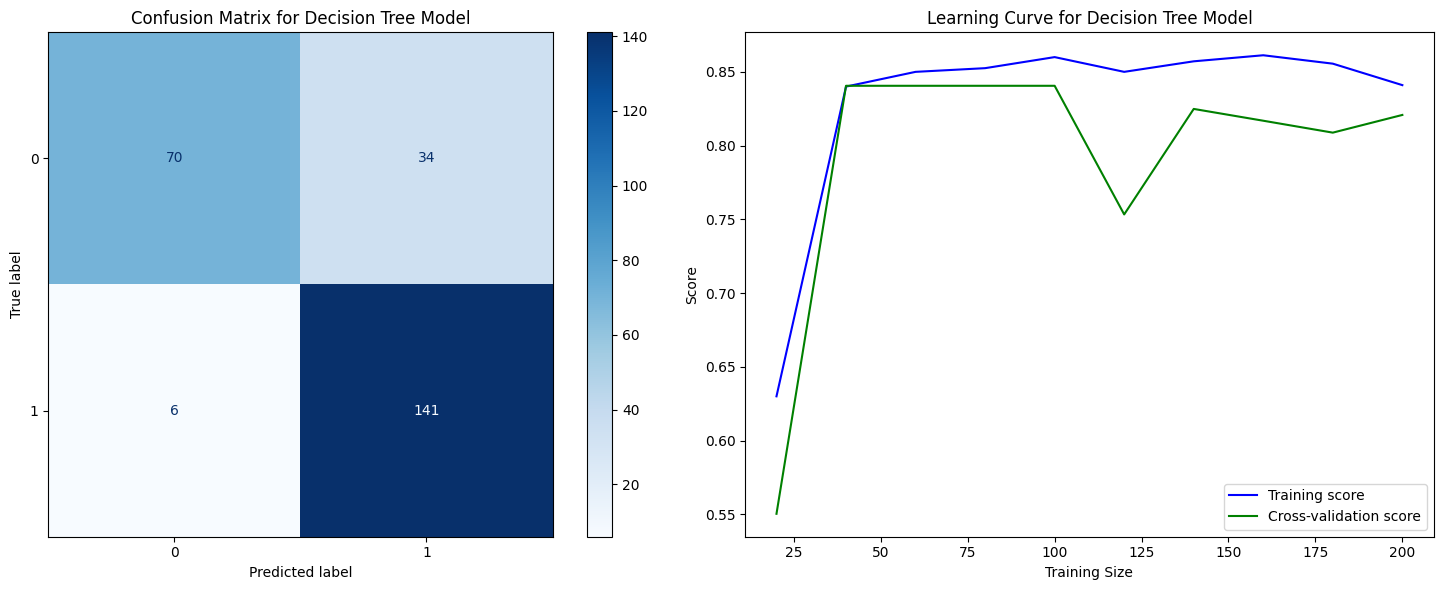

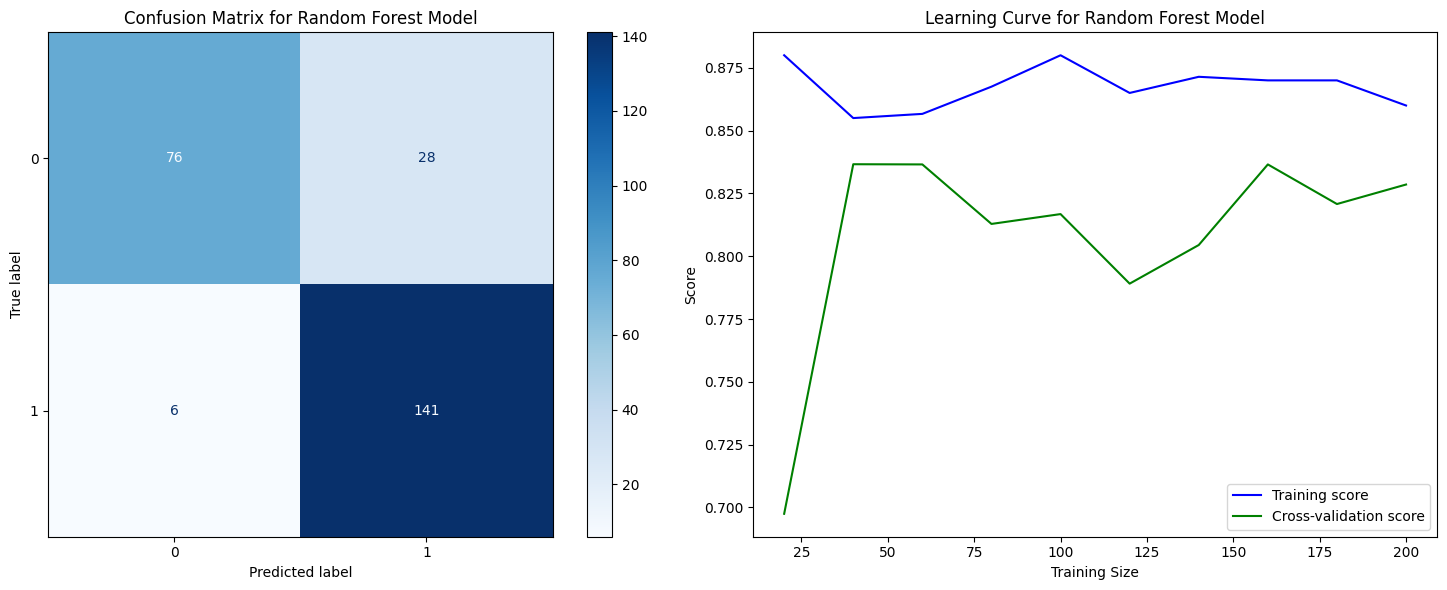

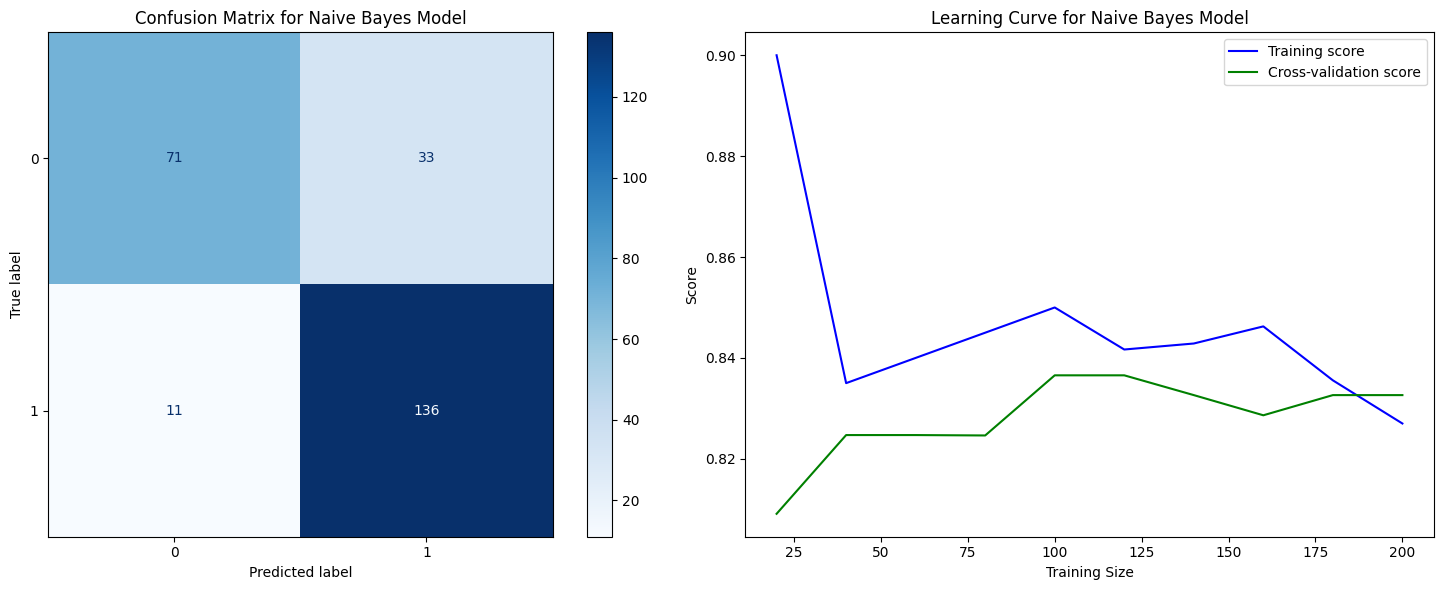

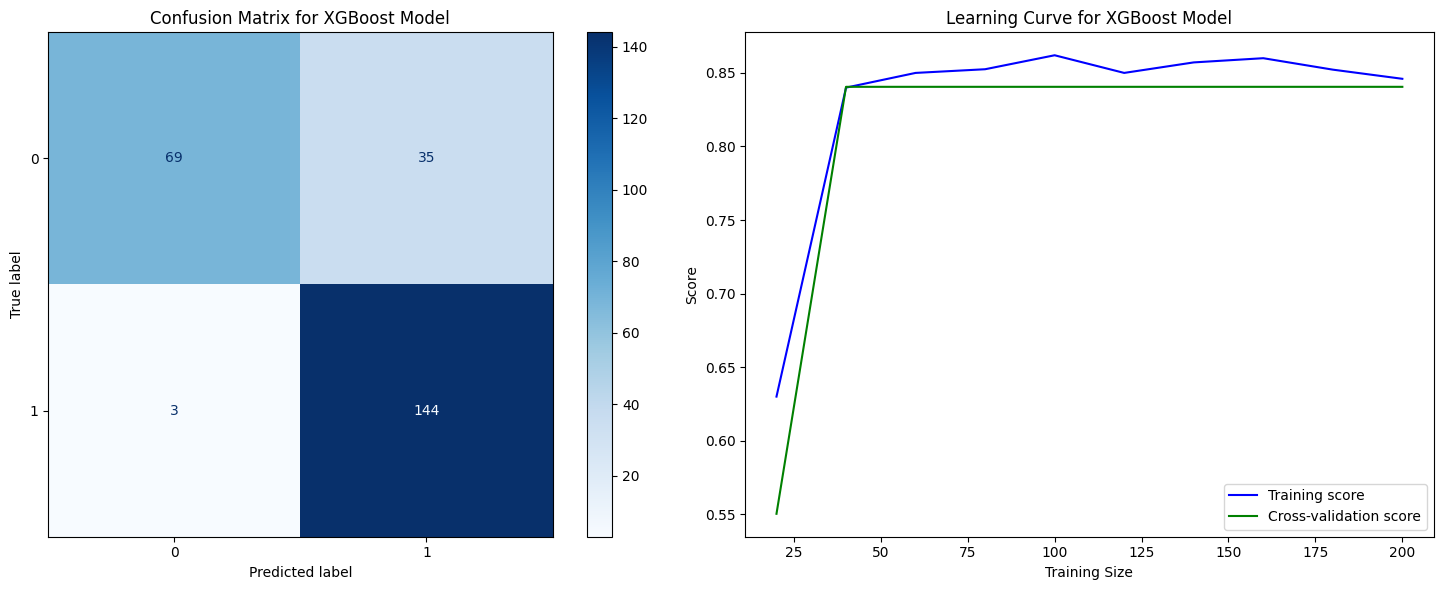

In [4]:
import logging
# Set the logger for Matplotlib to ignore debug logs
logging.getLogger('matplotlib').setLevel(logging.WARNING)

# Define model names
model_names = ['KNN', 'SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes','XGBoost']
for model_name in model_names:
    try:
        # Get model from get_model function
        model = get_model(model_name)
        model.fit(X, y)
        # 1. Confusion Matrix
        y_pred = model.predict(X)  # Predict using the trained model
        cm = confusion_matrix(y, y_pred) 
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)

        # 2. Learning Curve 
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
        )
        
        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))
        disp.plot(cmap=plt.cm.Blues, ax=axs[0])
        axs[0].set_title(f"Confusion Matrix for {model_name} Model")
        axs[1].plot(train_sizes, train_mean, label="Training score", color="blue")
        axs[1].plot(train_sizes, test_mean, label="Cross-validation score", color="green")
        axs[1].set_title(f"Learning Curve for {model_name} Model")
        axs[1].set_xlabel("Training Size")
        axs[1].set_ylabel("Score")
        axs[1].legend()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        logger.error(f"Error occurred while processing {model_name} model: {e}")


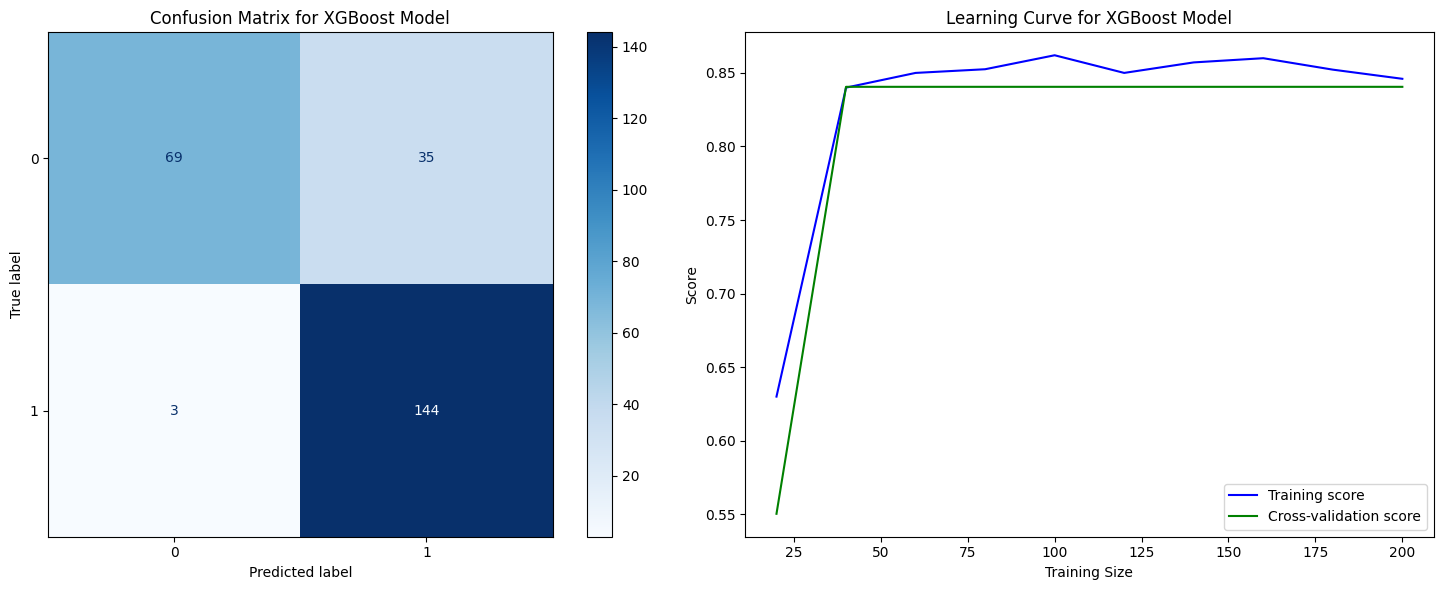